In [1]:
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv("employee_reviews.csv")
#df=pd.read_csv('C:/Users/sangeeth kumar/PycharmProjects/python_class2/employee_reviews.csv')

In [5]:
df.replace('none',np.NaN,inplace=True)

In [6]:
df.shape

(67529, 17)

In [7]:
df.head(3)

Unnamed: 0 company           location          dates  \
0           1  google                NaN   Dec 11, 2018   
1           2  google  Mountain View, CA   Jun 21, 2013   
2           3  google       New York, NY   May 10, 2014   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   

                                      advice-to-mgmt  overall-ratings  \
0                                                NaN              5.0   
1  1) Don't dismiss emotional intelligence and ad...              4.0   
2  Keep the focus on the user. Everything else wi...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  \
0                4.0                    5.0              0   
1                5.0                    3.0           2094   
2                5.0                    4.0            949   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...  
1  https://www.glassdoor.com/Reviews/Google-Revie...  
2  https://www.glassdoor.com/Reviews/Google-Revie...

In [8]:
df.isna().sum()

Unnamed: 0                        0
company                           0
location                      25085
dates                             0
job-title                         0
summary                         129
pros                              0
cons                              1
advice-to-mgmt                29461
overall-ratings                   0
work-balance-stars             7160
culture-values-stars          13546
carrer-opportunities-stars     7108
comp-benefit-stars             7161
senior-mangemnet-stars         7775
helpful-count                     0
link                              0
dtype: int64

In [9]:
df.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job-title                      object
summary                        object
pros                           object
cons                           object
advice-to-mgmt                 object
overall-ratings               float64
work-balance-stars             object
culture-values-stars           object
carrer-opportunities-stars     object
comp-benefit-stars             object
senior-mangemnet-stars         object
helpful-count                   int64
link                           object
dtype: object

In [10]:
df.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link'],
      dtype='object')

In [11]:
df['summary'].fillna('None',inplace=True)
df['advice-to-mgmt'].fillna('None',inplace=True)
df['cons'].fillna('None',inplace=True)

In [12]:
review_date=[]
for each_date in df['dates']:
    month=(each_date[:4])
    year=(each_date[-4:])
    date=month+' '+year
    review_date.append(date)


In [13]:
df['review_date']=review_date

In [14]:
df.drop(['Unnamed: 0','dates','work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars','link'],axis=1,inplace=True)

In [15]:
df['review_date'].nunique()

135

# EDA

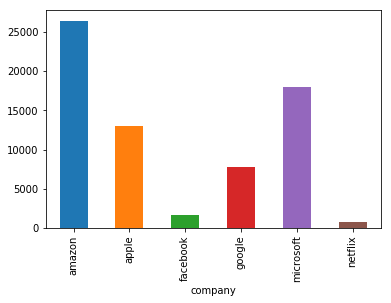

In [16]:
df.groupby('company')['overall-ratings'].count().plot(kind='bar')

In [17]:
print(df.groupby(['overall-ratings','company'])['company'].size().unstack(level=1,fill_value=0))
df.groupby(['overall-ratings','company'])['company'].count().unstack().plot(kind='bar',figsize=(7,))

company          amazon  apple  facebook  google  microsoft  netflix
overall-ratings                                                     
1.0                2461    484        47     155        639      120
2.0                2751    814        49     248       1308      112
3.0                5574   2266        98     763       3819      133
4.0                8091   4581       245    2275       7101      205
5.0                7553   4805      1151    4378       5063      240


TypeError: from_bounds() missing 1 required positional argument: 'height'

In [30]:
current_employees_df=df[df['job-title'].str.startswith('C')]
former_employees_df=df[df['job-title'].str.startswith('F')]

# current employees rating to their companies

company          amazon  apple  facebook  google  microsoft  netflix
overall-ratings                                                     
1.0                1097    190        20      70        320       27
2.0                1436    385        26     114        686       40
3.0                3411   1208        54     396       2188       43
4.0                5689   2516       159    1273       4541      121
5.0                5976   2980      1020    2826       3554      174


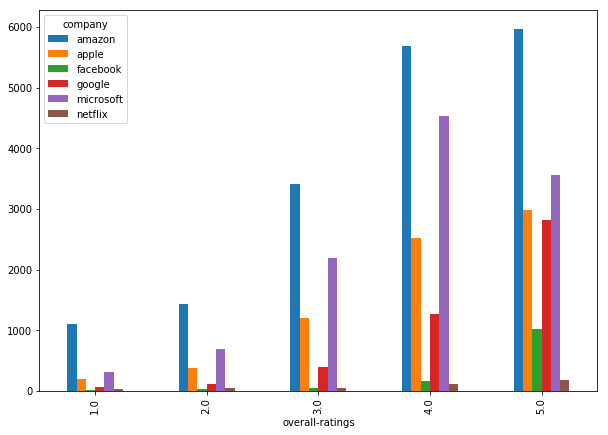

In [31]:
print(current_employees_df.groupby(['overall-ratings','company'])['company'].count().unstack(level=1,fill_value=0))
current_employees_df.groupby(['overall-ratings','company'])['company'].count().unstack().plot(kind='bar',figsize=(10,7))

In [32]:
df.head(5)

company           location                                 job-title  \
0  google                NaN     Current Employee - Anonymous Employee   
1  google  Mountain View, CA         Former Employee - Program Manager   
2  google       New York, NY  Current Employee - Software Engineer III   
3  google  Mountain View, CA     Current Employee - Anonymous Employee   
4  google    Los Angeles, CA       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  overall-ratings  \
0                                               None              5.0   
1  1) Don't dismiss emotional intelligence and ad...              4.0   
2  Keep the focus on the user. Everything else wi...              5.0   
3  Keep on NOT micromanaging - that is a huge ben...              5.0   
4  Promote managers into management for their man...              5.0   

   helpful-count review_date  
0              0    Dec 2018  
1           2094    Jun 2013  
2            949    May 2014  
3            498    Feb 2015  
4             49    Jul 2018

In [33]:
positive_reviews_df=df.loc[df['overall-ratings']>3.0]
neutral_reviews_df=df.loc[df['overall-ratings']==3.0]
negative_reviews_df=df.loc[df['overall-ratings']<3.0]

In [35]:
cols=['summary','pros','cons']
positive_df=positive_reviews_df[cols]
neutral_df=neutral_reviews_df[cols]
negative_df=negative_reviews_df[cols]

In [36]:
positive_df['all_reviews']=positive_df['summary']+" "+positive_df['pros']+" "+positive_df['cons']
positive_df=positive_df['all_reviews']

neutral_df['all_reviews']=neutral_df['summary']+" "+neutral_df['pros']+" "+neutral_df['cons']
neutral_df=neutral_df['all_reviews']

negative_df['all_reviews']=negative_df['summary']+" "+negative_df['pros']+" "+negative_df['cons']
negative_df=negative_df['all_reviews']

C:\Users\Srinivas Vadlamani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Srinivas Vadlamani\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Srinivas Vadlamani\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [37]:
positive_df

0        Best Company to work for People are smart and ...
1        Moving at the speed of light, burn out is inev...
2        Great balance between big-company security and...
3        The best place I've worked and also the most d...
4        Unique, one of a kind dream job Google is a wo...
5        NICE working in GOOGLE as an INTERN People are...
6        Software engineer Great working environment. G...
7        great place to work and progress work culture,...
8        Google Surpasses Realistic Expectations Great ...
9        Execellent for engineers Impact driven. Best t...
10       Nice place to work * Smart people * World clas...
11       Software Engineer * There is endless opportuni...
12       Best Company to Work For! Atmosphere that prom...
13       Still the best place to work! Amazing company....
14       Mba Intern Perks, autonomy, cool products, sma...
15       Review The people are great to work with There...
16       Review of Google The people are great to work .

In [38]:
import nltk
nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | D

[nltk_data]    |   Unzipping corpora\problem_reports.zip.
[nltk_data]    | Downloading package propbank to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package ptb to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\ptb.zip.
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\product_reviews_1.zip.
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\product_reviews_2.zip.
[nltk_data]    | Downloading package pros_cons to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading pack

[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Downloading package large_grammars to
[nltk_data]    |     C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\large_grammars.zip.
[nltk_data]    | Downloading package tagsets to C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package tagsets is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\bllip_wsj_no_aux.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\Srinivas
[nltk_data]    |     Vadlamani\AppData\Roaming\nltk_data...
[nltk_data]    | Error 

In [41]:
!pip install wordcloud

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud

In [43]:
import re
stopwords=nltk.corpus.stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [44]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
positive_texts=positive_df.str.cat(sep='.')
neutral_texts=neutral_df.str.cat(sep='.')
negative_texts=negative_df.str.cat(sep='.')

In [46]:
negative_texts

'Depends on what you\'re looking for For the right people it can be a great place. Good compensation, free food, massages, relaxed work environment. Projects can be boring or useless. Work may not be appreciated. Performance evaluation can be random. Colleges can be very nerdy and may never talk to you. SWEs may treat you like second-class citizens (even though the company emphasizes respect)..China Search Project is Concerning Intellectually stimulating place with many "benefits" I think the culture has lost its way. It\'s a shame..pockets of incompetence Overall, Google pays well and showers people with perks. There are pockets of excellence. The company is extremely profitable. There are deep, deep pockets of dysfunction and incompetence at Google. Do your due diligence on the team and manager you\'re considering joining. There are bozos at every company, and Google is no exception to this rule..WTF are they even doing? Pay was excellent. Perks were great. Office was awesome. Lunch 

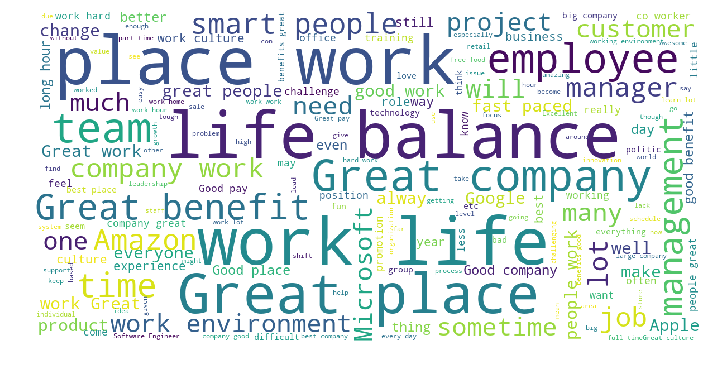

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(positive_texts)

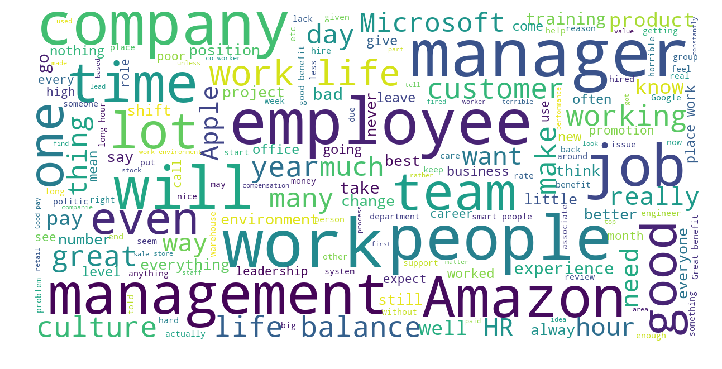

In [48]:
show_wordcloud(negative_texts)

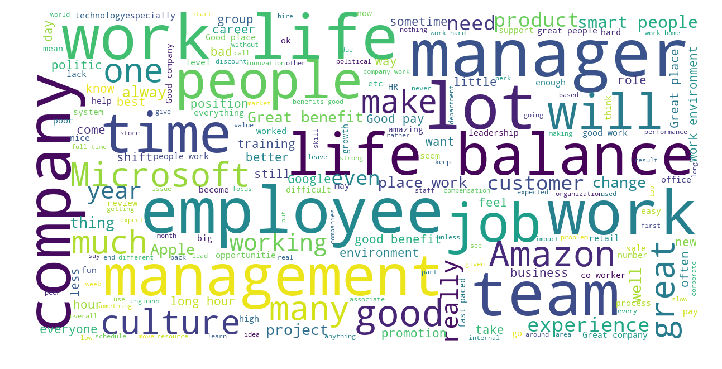

In [49]:
show_wordcloud(neutral_texts)

In [50]:
df.groupby(['company'])['pros','cons','summary']

In [51]:
def clean_text(text):
    text=re.sub(r"''","",text)
    text=text.replace("Etc.","")
    text=text.replace("etc.","")
    text=re.sub(r"[0-9]",'',text)
    text=re.sub(r'[!?:/)(*+~\"-,]','',text)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(text)
    
    reviews_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords):
            lem_word = lemmatizer.lemmatize(word)
            reviews_clean.append(lem_word)
 
    return reviews_clean

In [52]:
def bagOfWords(review):
    words=clean_text(review)
    word_dictionary=dict([word,True] for word in words)
    return word_dictionary

In [53]:
bagOfWords('Night shifts, Work gets a little')

{'night': True, 'shift': True, 'work': True, 'get': True, 'little': True}

In [54]:
positive_review_set=[]
for each_review in positive_texts.split('.'):
   positive_review_set.append((bagOfWords(each_review), 'Positive Review'))

In [55]:
positive_review_set[:2]

[({'best': True,
   'company': True,
   'work': True,
   'people': True,
   'smart': True,
   'friendly': True,
   'bureaucracy': True,
   'slowing': True,
   'thing': True},
  'Positive Review'),
 ({'moving': True,
   'speed': True,
   'light': True,
   'burn': True,
   'inevitable': True,
   'food': True},
  'Positive Review')]

In [56]:
neutral_review_set=[]
for each_review in neutral_texts.split('.'):
   neutral_review_set.append((bagOfWords(each_review), 'Neutral Review'))

In [57]:
negative_review_set=[]
for each_review in negative_texts.split('.'):
   negative_review_set.append((bagOfWords(each_review), 'Negative Review'))

In [58]:
from random import shuffle 
shuffle(positive_review_set)
shuffle(neutral_review_set)
shuffle(negative_review_set)
 
train_set = positive_review_set[:150000] + neutral_review_set[:150000] + negative_review_set[:150000]
test_set = positive_review_set[150000:] + neutral_review_set[150000:] + negative_review_set[150000:]
 
print(len(test_set),  len(train_set))

28410 274966


In [59]:
from nltk import classify
from nltk import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)
 
accuracy = classify.accuracy(classifier, test_set)
print(accuracy*100)

79.84864484336501


In [60]:
custom_review="a less work load and easy to get everything completed"

cr=bagOfWords(custom_review)
print(cr)
print(classifier.classify(cr))

{'le': True, 'work': True, 'load': True, 'easy': True, 'everything': True, 'completed': True}
Positive Review
